In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from scipy import stats #Fundamental library for scientific computing
matplotlib.style.use('ggplot') #for beautiful graph style
#With %matplotlib inline the output of plotting commands is displayed inline 
#directly below the code cell that produced it
%matplotlib inline

Инструкция запуска: 
    Чтобы датасет запустился, нужно переместить файлы с датасетом и ноутбуком в дефолтную рабочую директорию юпитер ноутбука.

https://www.kaggle.com/unsdsn/world-happiness - Датасет World Happiness Report
The World Happiness Report - это знаменательный обзор состояния глобального счастья. 
Признаки (Их 9): счастье, стандартное отклонение, экономика, институт брака, здравоохранение, свобода, государственная политика, щедрость населения, тенденции развития страны. 

In [2]:
df = pd.read_csv(r"./2015.csv")._get_numeric_data()
df = df.drop(columns='Standard Error')
print(df.shape)
df.head()


(158, 9)


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


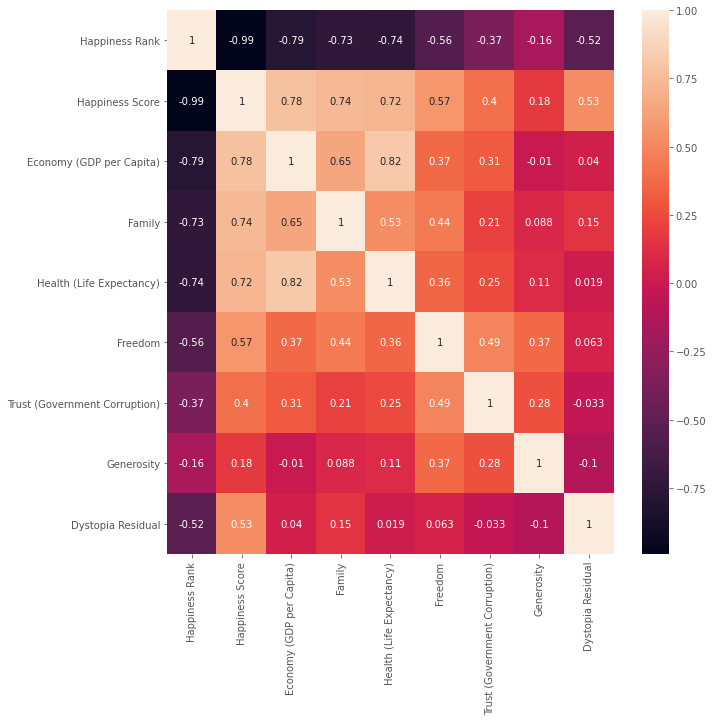

In [3]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(10,10))
# с подписями
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True )

# без подписей
#sns.heatmap(Var_Corr, annot=False, xticklabels=[], yticklabels=[] )

In [4]:
import math
from sklearn import preprocessing 

def scale_features (df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame (scaled, columns=df.columns)
    return scaled

In [5]:
# применяем скалирование которое объявили выше
scaled_df = scale_features(df)

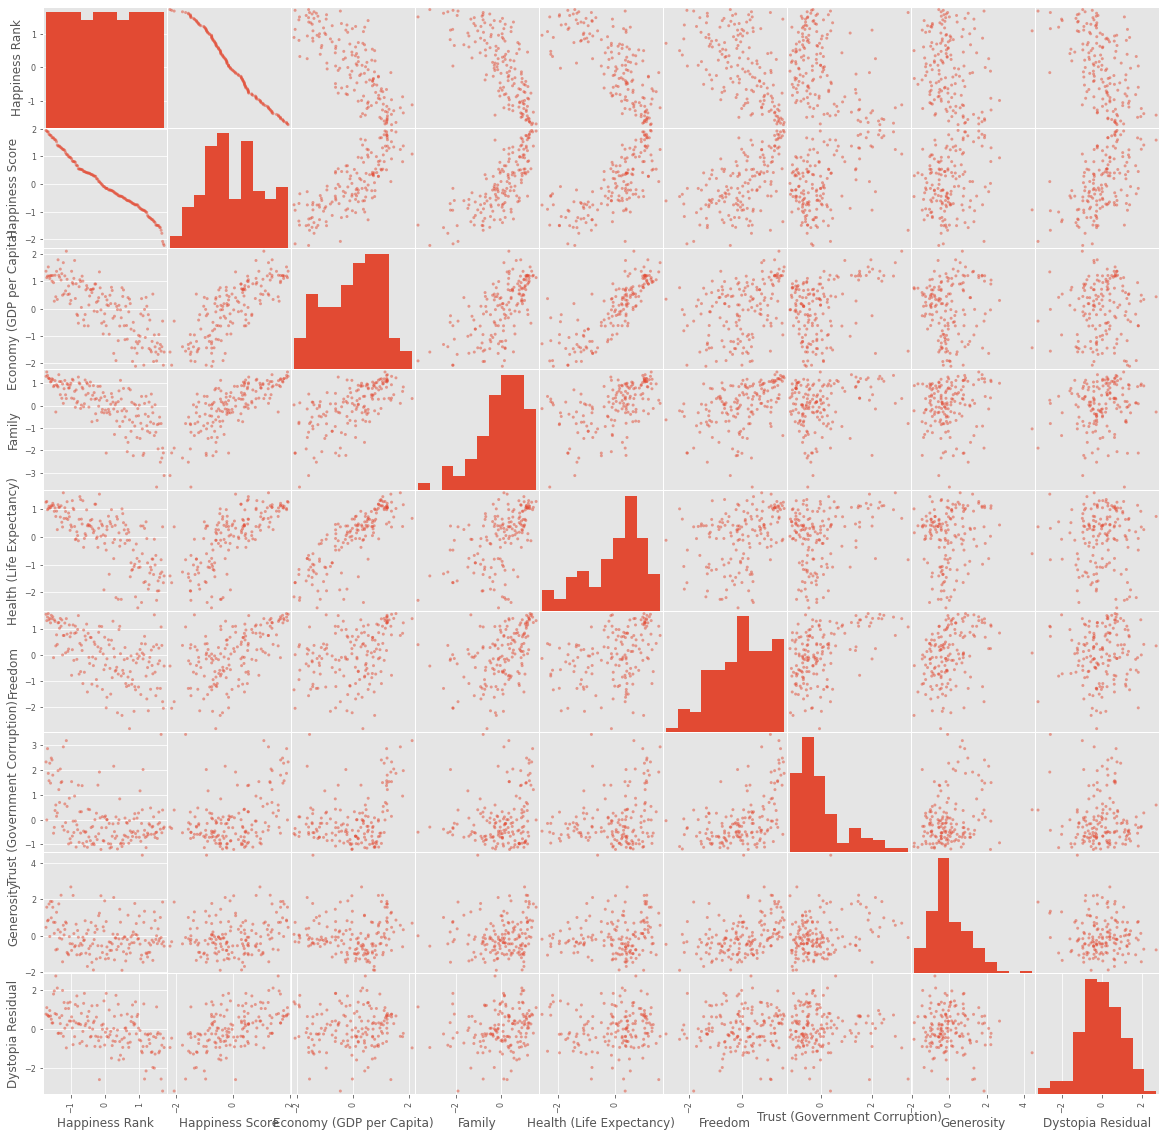

In [6]:
_=pd.plotting.scatter_matrix(scaled_df, figsize=(20,20))

Спроецируем данные на двумерную плоскость с помощью метода PCA библиотеки 
sklearn.decomposition

In [7]:
from sklearn.decomposition import PCA

n = scaled_df.shape[1]

pca = PCA (n_components = n)
pca.fit(scaled_df)


PCA(n_components=9)

# Критерий Кайзера
Оставляем только компоненты у которых собственные значения больше 1


In [8]:
pca.singular_values_

array([2.70954216e+01, 1.51227928e+01, 1.33059451e+01, 1.05584724e+01,
       9.16936130e+00, 7.80608050e+00, 4.88650449e+00, 1.31138862e+00,
       2.46238293e-03])

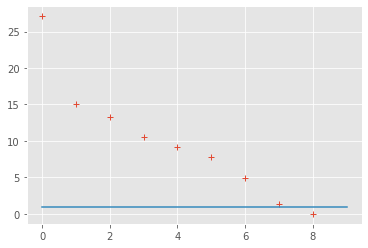

In [9]:
plt.plot(pca.singular_values_, '+')
plt.plot([0,n], [1,1])

### Критерий Кайзера говорит, что надо брать все главные компоненты кроме последней, но можно и предпоследнюю убрать, ведь она около единички

# Критерий сломанной трости
Нормируем собственные значения, чтобы их сумма была равна 1
считаем такие числа $$ l_i = \frac{1}{n}(\frac{1}{i} + \frac{1}{i+1} + ... + \frac{1}{n} )$$
берем компоненты пока работает правило $$ \lambda_i > l_i $$

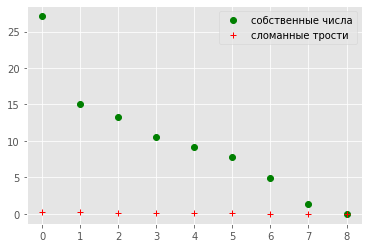

In [10]:

lis = [ sum(1/j for j in range(i, n+1)) / n for i in range(1, n + 1)]
lis = np.array(lis)

plt.plot(pca.singular_values_, 'go')
plt.plot(lis, 'r+')
plt.legend(['собственные числа' , 'сломанные трости'])

### По этому критерию - все кроме последней

# Критерий каменистой осыпи
 Данный критерий состоит в поиске точки, где убывание собственных значений замедляется наиболее сильно. Справа от этой точки находится, по-видимому, только "факторная осыпь"; "осыпь" - это геологический термин для обломков, которые скапливаются в нижней части каменистого склона.
 
 


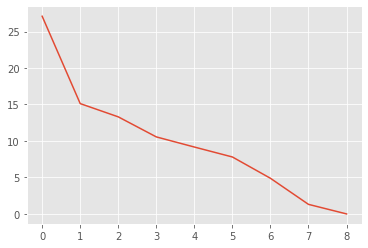

In [11]:
plt.plot(pca.singular_values_)

## Наблюдаем перелом после двух компонент

In [12]:
transformed_df = pca.transform(scaled_df)

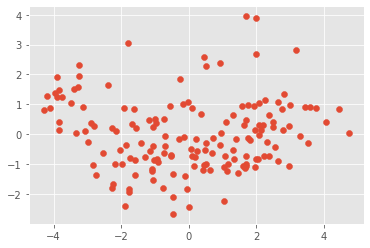

In [13]:
plt.scatter(transformed_df[:,0], transformed_df[:,1])

### Давайте возьмем 7 главных компонент, потому что они объясняют 100 % разброса (дисперсии)

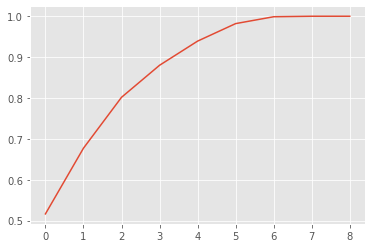

In [14]:
plt.plot(pca.explained_variance_ratio_.cumsum())

# Анализ главных компонент

In [15]:
number_of_components = 7 # сколько берем компонент

factor_weights_values = pca.components_[:number_of_components]  # матрица, сами значения

# датафрейм с этой матрицей
factor_weights_df = pd.DataFrame(
        data={
            df.columns[i]:factor_weights_values[:,i] for i in range(number_of_components)
        })

In [16]:
# посмотрим на эту матрицу, строчки - компоненты МГК, столбцы - вклад признака в компоненту
factor_weights_df

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
0,0.449314,-0.451143,-0.390949,-0.362678,-0.369378,-0.302198,-0.220788
1,0.145843,-0.129758,-0.098413,-0.088372,-0.040271,0.389990,0.463175
2,0.131651,-0.151491,0.401608,0.135312,0.389987,-0.196660,-0.122831
3,0.030340,-0.023172,0.047649,-0.194356,-0.135411,0.088770,0.723586
4,-0.070290,0.064444,0.160720,-0.605380,0.405778,-0.521907,0.222733
5,-0.005092,-0.026349,0.013740,-0.573036,0.298396,0.647005,-0.352444
6,-0.040432,0.053841,0.723861,-0.237212,-0.620066,0.031378,-0.123731


In [17]:
# суммарная нагрузка если брать сумму с учетом знака, потом взять модуль
factor_weights_df.sum().abs().sort_values(ascending=False)

Family                           1.925722
Economy (GDP per Capita)         0.858215
Happiness Score                  0.663628
Happiness Rank                   0.641335
Trust (Government Corruption)    0.589700
Freedom                          0.136379
Health (Life Expectancy)         0.070964
dtype: float64

In [18]:
# суммарная нагрузка если брать сумму модулей
#factor_weights_df.abs().sum().sort_values(ascending=False)

# Анализ остатков

In [19]:
transformed_df_copy = transformed_df.copy() # скопируем, на всякий случай

transformed_df_copy[:, number_of_components:] = 0 # занулим те компоненты, которые не нужны

transformed_back_again_df = pca.inverse_transform(transformed_df_copy)  # трансофрмировали в обратное пространство признаков

# остаток
remainder = transformed_back_again_df - scaled_df  # остаток это разница того что получилось после зануления и что было до

from scipy.linalg import norm

print(f'норма оригинальной матрицы {norm(scaled_df)}')
print(f'норма остатка {norm(remainder)}') 

норма оригинальной матрицы 37.70941526992961
норма остатка 1.3113909288807506


# Вывод
Мы занулили значения у последних двух компонент.
После обратного преобразования разница с тем что было около 3 %
То есть на 97 % получили похожие датасеты, если учитывать 7 из 9 компонент

In [20]:
scaled_df

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.633576,-1.674055,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,1.655501,-1.783571,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.677427,-2.076199,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,1.699352,-2.164688,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [21]:
# точность трансформирования в зависимости сколько берем компонент


def accuracy_of_transorming(n_comp):
    transformed_df_copy = transformed_df.copy()
    transformed_df_copy[:, n_comp:] = 0
    transformed_back_again_df = pca.inverse_transform(transformed_df_copy)
    remainder = transformed_back_again_df - scaled_df
    from scipy.linalg import norm
    return 1 - norm(remainder)/norm(transformed_df)
    
print(f'{accuracy_of_transorming(9):.2}')
print(f'{accuracy_of_transorming(8):.2}')
print(f'{accuracy_of_transorming(7):.2}')
print(f'{accuracy_of_transorming(4):.2}')
print(f'{accuracy_of_transorming(2):.2}')


1.0
1.0
0.97
0.65
0.43
